In [1]:
!python -V

Python 3.12.8


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import root_mean_squared_error

In [3]:
data_paths = [
    "../data/yellow_tripdata_2023-01.parquet",
    "../data/yellow_tripdata_2023-02.parquet",
]
df = pd.read_parquet(data_paths[0])

df["duration"] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

df = df[(df.duration >= 1) & (df.duration <= 60)]

categorical = ["PULocationID", "DOLocationID"]
numerical = ["trip_distance"]

df[categorical] = df[categorical].astype(str)

In [4]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

root_mean_squared_error(y_train, y_pred)

7.658405703368252

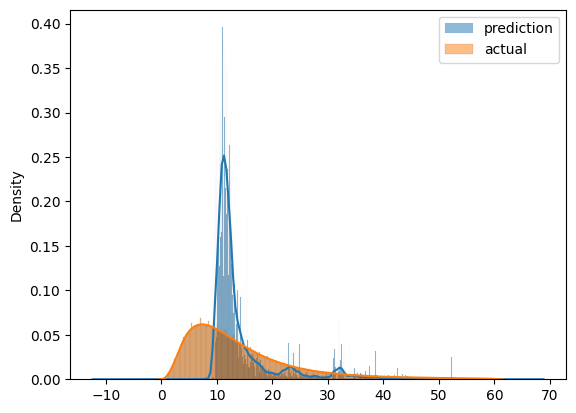

In [5]:
sns.histplot(y_pred, label="prediction", kde=True, stat="density", kde_kws=dict(cut=3))
sns.histplot(y_train, label="actual", kde=True, stat="density", kde_kws=dict(cut=3))

plt.legend()

In [6]:
def read_dataframe(filename, rows_limit=None):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename, nrows=rows_limit)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)[:rows_limit]

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    print('duration std before removing outliers', filename, df.duration.std())

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [7]:
df_train = read_dataframe(data_paths[0])
df_val = read_dataframe(data_paths[1])

duration std before removing outliers ../data/yellow_tripdata_2023-01.parquet 42.59435124195458
duration std before removing outliers ../data/yellow_tripdata_2023-02.parquet 42.84210176105113


In [8]:
len(pd.read_parquet(data_paths[0]).columns) # A1. 19
# # print(df.duration.std()) inside read func before removing outliers # A2. 59
print(len(df_train) / len(pd.read_parquet(data_paths[0]))) # A3. 98%

0.9812202822125979


In [ ]:
train_feat = df_train[['PULocationID', 'DOLocationID']] # [:10]
train_feat_dict = train_feat.to_dict(orient='records')
dv_train = DictVectorizer()
dv_train_feat = dv_train.fit_transform(train_feat_dict)
print(dv_train_feat.columns.shape) # A4. 515

(3009173, 515)


In [11]:
train_tgt = df_train['duration']

model_q5 = LinearRegression()
model_q5 = model_q5.fit(dv_train_feat, train_tgt)

pred_q5 = model_q5.predict(dv_train_feat)
print(root_mean_squared_error(train_tgt, pred_q5)) # A5. 7.649

7.649261937621321


In [12]:
val_tgt = df_val['duration']

val_feat = df_val[['PULocationID', 'DOLocationID']] # [:10]
val_feat_dict = val_feat.to_dict(orient='records')
dv_val_feat = dv_train.transform(val_feat_dict)
pred_q6 = model_q5.predict(dv_val_feat)
print(root_mean_squared_error(val_tgt, pred_q6)) # A6. 7.811

7.811817646307258
